In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table, vstack
from astropy.io import fits
import astropy.units as u

import gala.coordinates as gc

import pickle
import pandas as pd

coord.galactocentric_frame_defaults.set('v4.0')
import galstreams


In [2]:
mwsts = galstreams.MWStreams(verbose=False, implement_Off=False)

Initializing galstreams library from master_log... 


In [3]:
mwsts.summary

,Imp,On,TrackName,Name,TrackRefs,TrackRefsLatex,Notes,length,ra_o,dec_o,...,dec_f,distance_f,ra_mid,dec_mid,distance_mid,ra_pole,dec_pole,InfoFlags,DiscoveryRefs,ID
TrackName,,,,,,,,,,,,,,,,,,,,,
20.0-1-M18,po,True,20.0-1-M18,20.0-1,mateu2018,Mateu2018,-,36.619756,280.225879,-41.031405,...,-16.281973,25.126725,298.182168,-29.913159,26.839948,235.758575,38.821881,0000,Mateu2018,1
300S-F18,st,True,300S-F18,300S,fu2018,Fu2018,-,11.084050,151.800005,16.046962,...,14.448969,14.350060,157.510431,15.343949,15.929409,308.056470,72.509388,1101,"NiedersteOstholt2009,Simon2011",2
AAU-AliqaUma-L21,st,True,AAU-AliqaUma-L21,AAU-AliqaUma,li2021,Li2021,-,9.677187,0.417097,-15.901759,...,-20.427757,24.636741,4.915075,-18.117867,26.923444,64.503226,57.120874,1111,Shipp2018,3
AAU-ATLAS-L21,st,True,AAU-ATLAS-L21,AAU-ATLAS,li2021,Li2021,-,23.561687,8.931901,-21.023379,...,-33.199331,18.525495,20.058646,-26.983189,20.885277,73.360646,49.567099,1111,Koposov2014,4
Acheron-G09,ep,True,Acheron-G09,Acheron,grillmair2009,Grillmair2009,-,36.532092,230.000000,-2.000000,...,21.000000,3.800000,244.604606,10.300419,3.656382,142.339428,49.453184,0000,Grillmair2009,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turranburra-S19,st,True,Turranburra-S19,Turranburra,shipp2019,"Shipp2019,Shipp2018",-,13.729050,59.707970,-18.554702,...,-25.275911,27.500000,67.141164,-22.183041,27.500000,123.473122,53.283631,1010,Shipp2018,93
Vid-I21,st,True,Vid-I21,Vid,ibata2021,Ibata2021,-,18.115243,17.350232,-25.248735,...,-34.861329,20.394279,25.819117,-30.331205,24.642130,80.544842,44.626077,1110,Ibata2021,94
Wambelong-S18,ep,True,Wambelong-S18,Wambelong,shipp2018,"Shipp2018,Shipp2019",-,14.162214,90.500000,-45.600000,...,-34.300000,15.100000,84.434473,-40.084053,15.100000,328.673187,-27.312855,0020,Shipp2018,95


In [4]:
gsr = coord.Galactocentric()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cm

from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import Angle

# this will require installing gala, see here: http://gala.adrian.pw/en/latest/index.html
import gala.coordinates as gc
import gala.potential as gp
import gala.dynamics as gd
from gala.units import galactic
from gala.dynamics.nbody import DirectNBody
import gala.integrate as gi

%matplotlib inline
%config InlineBackend.figure_format='retina'

from helpers.SimulationAnalysis import SimulationAnalysis, iterTrees
from helpers.SimulationAnalysis import readHlist

In [6]:
#Path to simulation data
path_to_data = ''

#Halo properties to load; see Section 2.4 of https://arxiv.org/abs/2008.08591 for info on Rockstar fields 
fields = ['scale','id', 'upid', 'pid', 'mvir', 'mpeak', 'rvir', 'rs', 'RVmax', 'vmax', 'vpeak', 'x', 'y', 'z', 'vx', 'vy', 'vz',
          'M200c', 'depth_first_id','scale_of_last_MM']

#Load z = 0 halo list for Halo416_16K
halos_z0 = readHlist(path_to_data+'hlist_1.00000.list',fields=fields)
MW_analog = halos_z0[np.argmax(halos_z0['mvir'])]

subhalos_z0 = halos_z0[halos_z0['upid']==MW_analog['id']]
LMC_analog = subhalos_z0[np.argmax(subhalos_z0['mvir'])]


#Reading in data from dm particles
t = Table.read('snapshot_now.fits')

# ind_lmc = subhalos_z0['pid']==LMC_analog['id']
ind_lmc = np.argmax(subhalos_z0['mvir'])



In [7]:
h = 0.7
ts = Table(subhalos_z0)
for comp in ['x', 'y', 'z']:
    ts[comp] = ((ts[comp] - MW_analog[comp])*u.Mpc/h).to(u.kpc)
for comp in ['vx', 'vy', 'vz']:
    ts[comp] = (ts[comp] - MW_analog[comp])*u.km/u.s

In [8]:
ind_massive = (ts['mvir'] > 10**7)
len(ts['mvir'][ind_massive])

1072

In [9]:
c = coord.Galactocentric(x=ts['x'][ind_massive], y=ts['y'][ind_massive], z=ts['z'][ind_massive],
                         v_x=ts['vx'][ind_massive], v_y=ts['vy'][ind_massive], v_z=ts['vz'][ind_massive])
ceq = c.transform_to(coord.ICRS())

In [10]:
ceq_lmc = coord.ICRS(ra=78.76*u.deg, dec=-69.19*u.deg, distance=(10**(0.2*18.50+1)*u.pc).to(u.kpc), 
                     radial_velocity=262.2*u.km/u.s, pm_ra_cosdec=1.91*u.mas/u.yr, pm_dec=0.229*u.mas/u.yr)
c_lmc = ceq_lmc.transform_to(coord.Galactocentric())

In [11]:
vsim = np.array([c.x.value[ind_lmc], c.y.value[ind_lmc], c.z.value[ind_lmc]]) #this is the u vector 
vsim = vsim / np.linalg.norm(vsim)

vtrue = np.array([c_lmc.x.value, c_lmc.y.value, c_lmc.z.value]) #this is the v vector 
vtrue = vtrue / np.linalg.norm(vtrue)

In [12]:
vpole = np.cross(vsim, vtrue)
vpole = vpole / np.linalg.norm(vpole)

In [13]:
theta = np.arccos(np.dot(vsim,vtrue)/(np.linalg.norm(vsim)*np.linalg.norm(vtrue)))

In [14]:
#ROTATION MATRIX
R = np.array([[np.cos(theta) + vpole[0]**2*(1-np.cos(theta)),
              vpole[0]*vpole[1]*(1-np.cos(theta)) - vpole[2]*np.sin(theta),
              vpole[0]*vpole[2]*(1-np.cos(theta)) + vpole[1]*np.sin(theta)],
             [vpole[1]*vpole[0]*(1-np.cos(theta)) + vpole[2]*np.sin(theta),
              np.cos(theta) + vpole[1]**2*(1-np.cos(theta)),
              vpole[1]*vpole[2]*(1-np.cos(theta)) - vpole[0]*np.sin(theta)],
             [vpole[2]*vpole[0]*(1-np.cos(theta)) - vpole[1]*np.sin(theta),
              vpole[2]*vpole[1]*(1-np.cos(theta)) + vpole[0]*np.sin(theta),
              np.cos(theta) + vpole[2]**2*(1-np.cos(theta))]])

In [15]:
vtest = np.matmul(R,vsim)
vtest

array([-0.01956117, -0.8275426 , -0.5610621 ])

In [16]:
vtrue

array([-0.01956117, -0.82754257, -0.56106208])

In [17]:
trot = Table(subhalos_z0[ind_massive])
N = len(trot)
trot['x'] = np.zeros(N)#*u.kpc
trot['y'] = np.zeros(N)#*u.kpc
trot['z'] = np.zeros(N)#*u.kpc

for i in range(N):
    temp_vec = np.array([ts['x'][ind_massive][i], ts['y'][ind_massive][i], ts['z'][ind_massive][i]])
    rot_vec = np.matmul(R, temp_vec)
    
    trot['x'][i] = rot_vec[0]#*u.kpc
    trot['y'][i] = rot_vec[1]#*u.kpc
    trot['z'][i] = rot_vec[2]#*u.kpc

In [18]:
print('The dimensions of the data:', len(mwsts.keys()), 'x', len(trot['x'])) 

The dimensions of the data: 97 x 1072


In [19]:
data_all = pd.DataFrame()
for st in mwsts.keys():
    print(st)
    data_new = {'Name':[st]}
    data_temp = pd.DataFrame(data=data_new)
    for subh in range(len(trot['x'])): #subh stands for individual subhalo
        print(subh)
        dist_x = mwsts[st].track.transform_to(gsr).x - trot['x'][subh]*u.kpc
        dist_y = mwsts[st].track.transform_to(gsr).y - trot['y'][subh]*u.kpc
        dist_z = mwsts[st].track.transform_to(gsr).z - trot['z'][subh]*u.kpc
        tot_dist = np.sqrt((dist_x**2) + (dist_y**2) + (dist_z**2))
        min_dist = np.amin(tot_dist)
        data_temp['Subhalo_'+ str(subh)+ ' (kpc)'] = [min_dist.value] #subhalo count begins at zero 
    data_all = data_all.append(data_temp, ignore_index=True)

20.0-1-M18
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274

KeyboardInterrupt: 

In [ ]:
data_all

In [ ]:
data_all.to_csv('20220727_Complete_Data_Subhalo_to_Stream_Distance.csv',index=False)


In [20]:
#USED TO READ IN NEW COMPLETE DATA
data_complete_updated = pd.read_csv('20220727_Complete_Data_Subhalo_to_Stream_Distance.csv')

In [21]:
data_complete_updated

,Name,Subhalo_0 (kpc),Subhalo_1 (kpc),Subhalo_2 (kpc),Subhalo_3 (kpc),Subhalo_4 (kpc),Subhalo_5 (kpc),Subhalo_6 (kpc),Subhalo_7 (kpc),Subhalo_8 (kpc),...,Subhalo_1062 (kpc),Subhalo_1063 (kpc),Subhalo_1064 (kpc),Subhalo_1065 (kpc),Subhalo_1066 (kpc),Subhalo_1067 (kpc),Subhalo_1068 (kpc),Subhalo_1069 (kpc),Subhalo_1070 (kpc),Subhalo_1071 (kpc)
0,20.0-1-M18,96.125488,110.203072,279.527270,159.543109,109.367049,283.024522,97.380167,188.192065,228.925626,...,126.474416,100.578684,134.660640,129.086641,142.694416,136.658615,102.594118,213.389389,219.224383,133.921979
1,300S-F18,103.860247,126.150558,279.966654,189.463545,91.733697,297.547259,131.253776,157.874095,191.563736,...,163.958572,118.471081,107.898629,121.266635,119.377227,153.154252,71.494913,233.095093,193.054959,118.829699
2,AAU-AliqaUma-L21,91.992972,108.765353,293.615754,170.528202,87.575430,310.779784,111.884931,185.923846,226.253138,...,136.224703,98.895998,135.223542,152.709911,150.034819,139.008683,110.234675,204.850545,222.303374,113.448718
3,AAU-ATLAS-L21,87.703690,106.826566,295.027747,171.076113,83.143622,305.444755,113.115563,181.948509,219.738178,...,139.818407,97.737481,124.747662,144.363483,146.419776,136.478471,103.246197,210.004051,211.779893,108.568121
4,Acheron-G09,101.622110,121.423538,278.510475,181.632687,97.141819,298.515880,121.878820,169.437490,206.895195,...,151.916905,112.772059,122.072018,129.026489,127.439885,149.234252,84.626027,222.871240,207.749541,123.602724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Turranburra-S19,81.087141,103.988262,304.733076,177.326375,68.124787,307.753535,124.455073,177.884530,212.855773,...,156.754588,96.258997,111.612846,143.752015,148.482678,133.502412,101.904439,220.316436,198.855692,93.858335
93,Vid-I21,84.114777,102.701333,297.596093,169.369783,80.346689,305.388530,113.432755,183.151746,220.658078,...,141.416507,93.429482,124.022964,145.017979,148.211159,132.852285,104.627233,212.552947,211.098083,105.097458
94,Wambelong-S18,86.321059,107.879102,296.305530,174.910600,80.603944,297.920599,118.985016,175.205697,210.500435,...,152.803405,99.823849,112.669964,132.391588,140.150885,136.220672,93.273018,227.303111,199.442405,106.108126
95,Willka_Yaku-S18,68.360500,86.284744,313.550614,153.068346,80.748331,291.442408,99.410329,198.935694,233.561456,...,134.802541,77.317593,120.780858,141.814270,163.484709,115.481162,115.743271,230.517964,206.978448,99.864927


In [22]:
#t = np.array(t)
c = coord.Galactocentric(x=trot['x']*u.kpc, y=trot['y']*u.kpc, z=trot['z']*u.kpc)
c_eq = c.transform_to(coord.ICRS)
cgal = c_eq.transform_to(coord.Galactic)

In [23]:
c_ss_MW = coord.Galactocentric(x=0*np.array(len(trot['x']))*u.kpc, y=0*np.array(len(trot['x']))*u.kpc, 
                               z=0*np.array(len(trot['x']))*u.kpc)
c_eq_ss_MW = c_ss_MW.transform_to(coord.ICRS)
cgal_ss_MW = c_eq_ss_MW.transform_to(coord.Galactic)

In [24]:
ceq_lmc = coord.ICRS(ra=78.76*u.deg, dec=-69.19*u.deg, distance=(10**(0.2*18.50+1)*u.pc).to(u.kpc), 
                     radial_velocity=262.2*u.km/u.s, pm_ra_cosdec=1.91*u.mas/u.yr, pm_dec=0.229*u.mas/u.yr)
c_lmc = ceq_lmc.transform_to(coord.Galactocentric())
c_lmc_gal = c_lmc.transform_to(coord.Galactic)

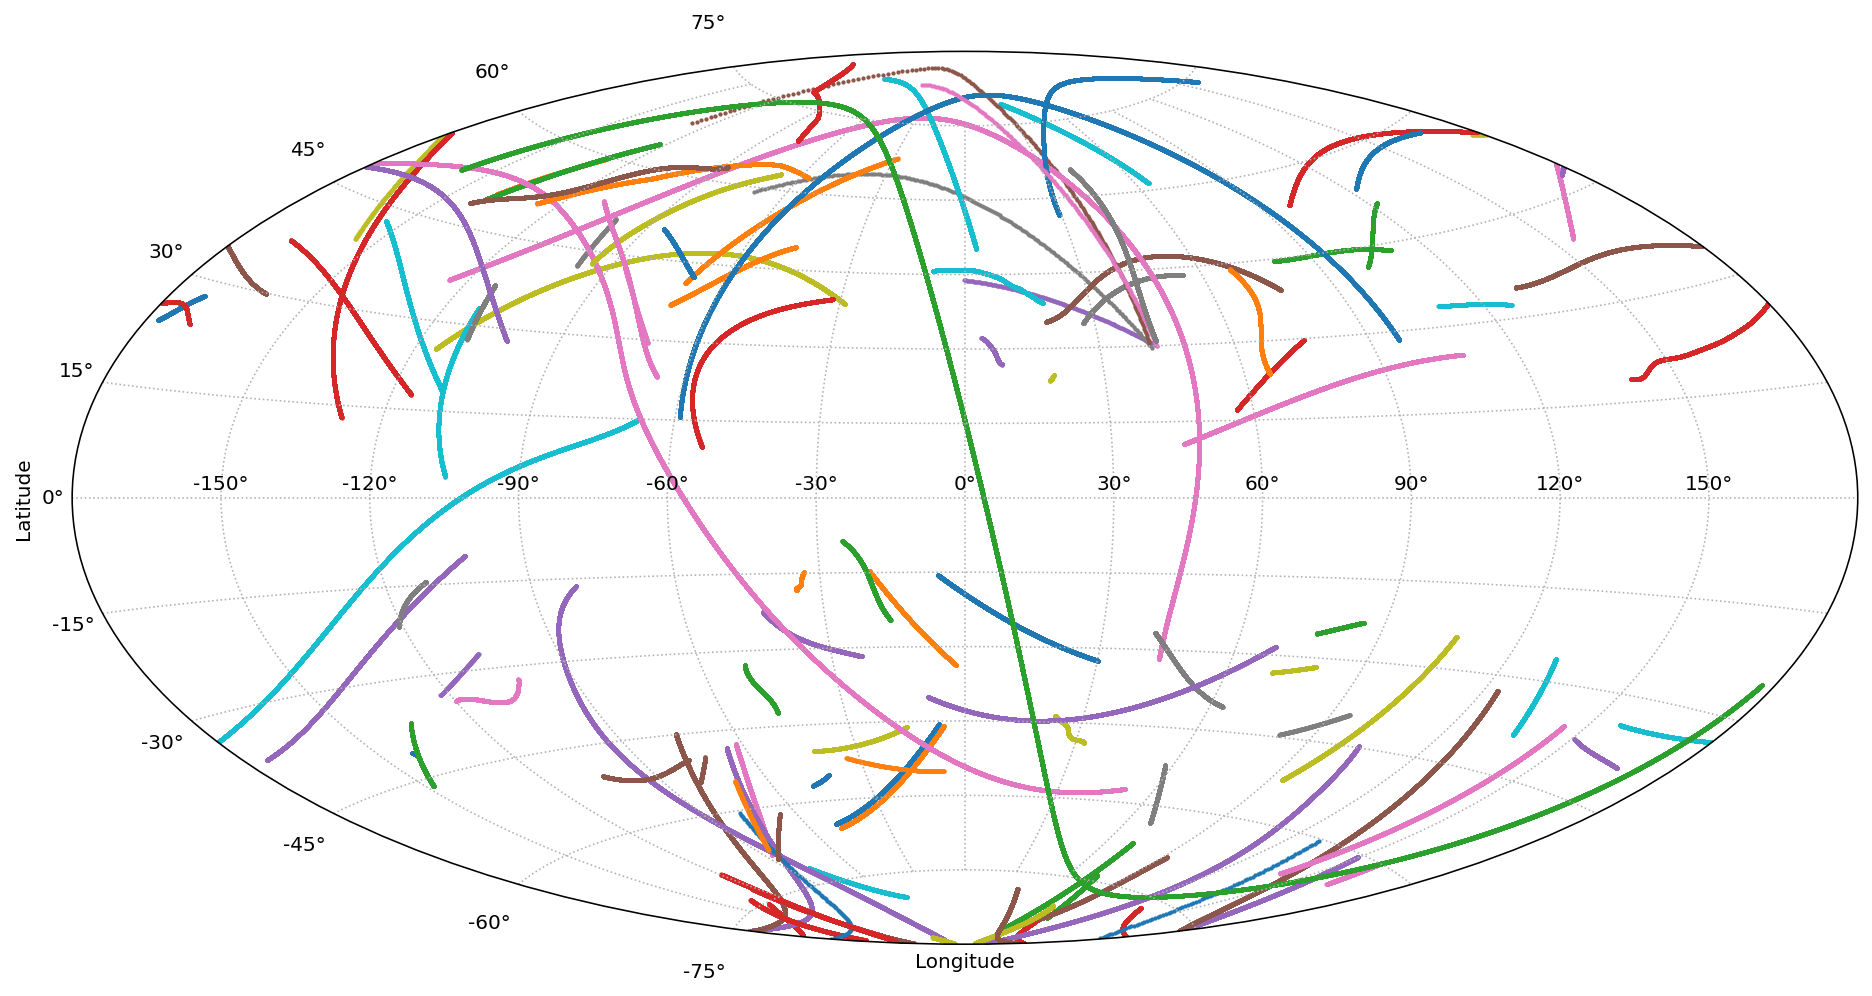

In [27]:
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='aitoff')
ind_massive = (trot['mvir'] > 10**7)

for st in mwsts.keys():
  ax.scatter(mwsts[st].track.galactic.l.wrap_at(180*u.deg).rad, 
             mwsts[st].track.galactic.b.rad, marker='.', s=5,)

ax.grid(ls=':')
ax.tick_params(axis='y', colors='black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

plt.savefig('Streams_In_Galactic_Coordinates.png')

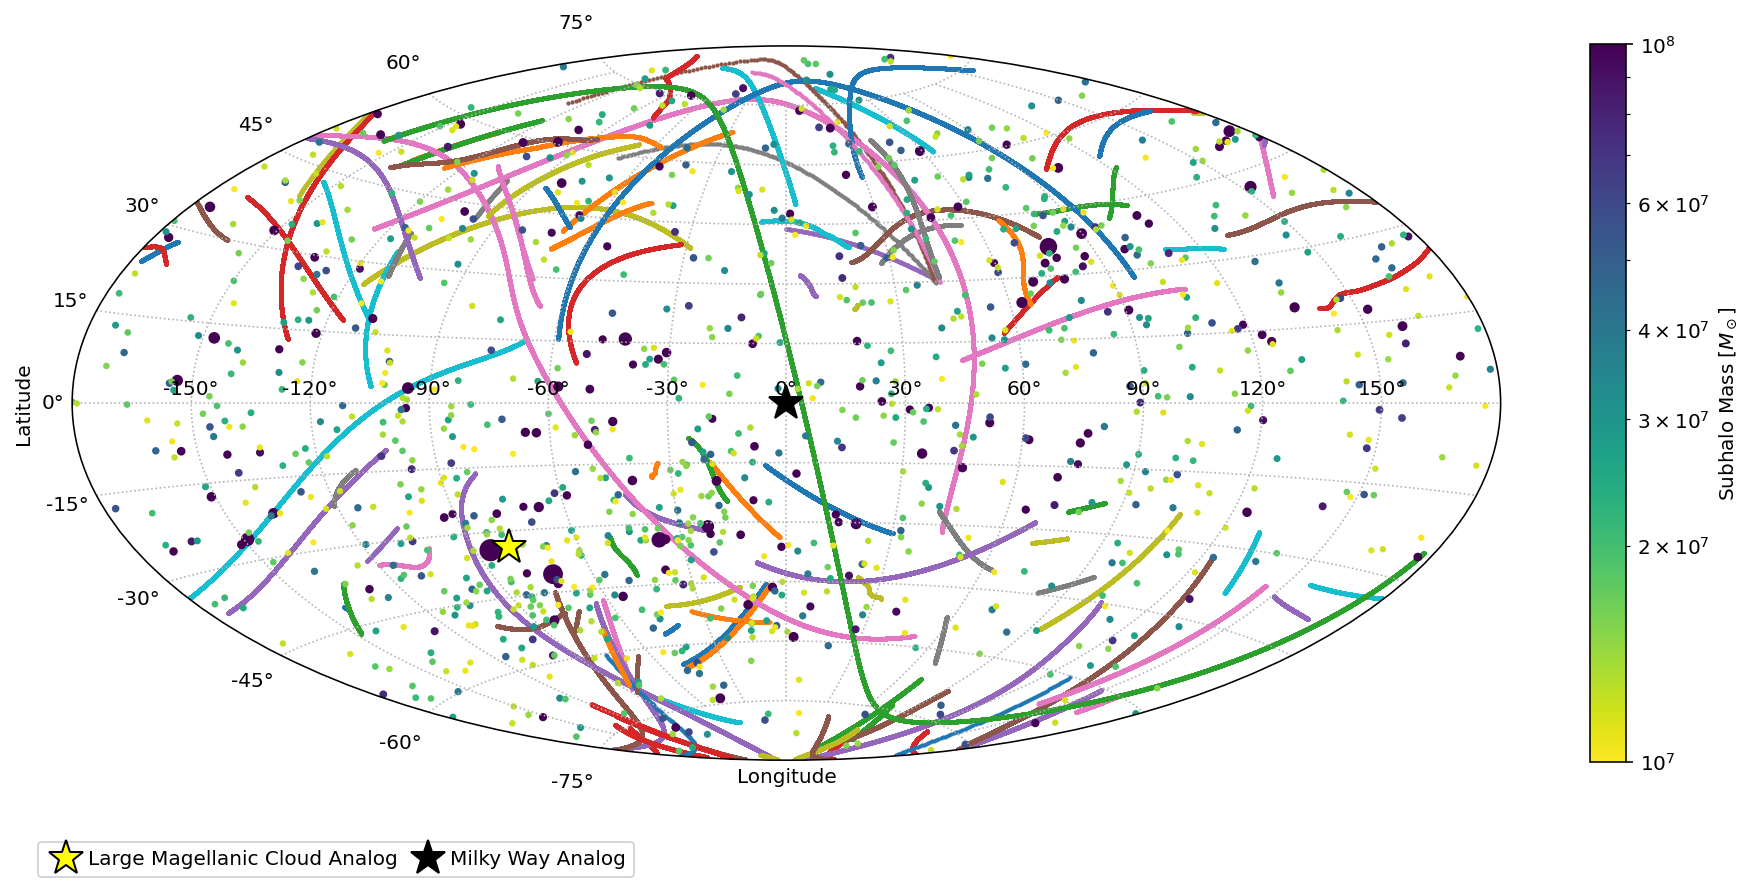

In [31]:
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='aitoff') 
ind_massive = (trot['mvir'] > 10**7) 

for st in mwsts.keys():
  ax.scatter(mwsts[st].track.galactic.l.wrap_at(180*u.deg).rad, 
             mwsts[st].track.galactic.b.rad, marker='.', s=5,)

#plt.plot(cgal.l.wrap_at(180*u.deg).rad, cgal.b.rad, '.r', ms=1)
plt.plot(c_lmc_gal.l.wrap_at(180*u.deg).rad, c_lmc_gal.b.rad, '*', color='yellow', mec='black', ms=18, 
         label='Large Magellanic Cloud Analog')
plt.plot(cgal_ss_MW.l.wrap_at(180*u.deg).rad, cgal_ss_MW.b.rad, '*', color='black', ms=18, 
         label='Milky Way Analog')

sc = ax.scatter(cgal.l.wrap_at(180*u.deg).rad[ind_massive], cgal.b.rad[ind_massive], 
                c=trot['mvir'][ind_massive], norm=mpl.colors.LogNorm(vmin=(10**7), vmax=(10**8)), 
                s=trot['rvir'][ind_massive], zorder=1, cmap='viridis_r')

ax.legend(ncol=8,loc='best', columnspacing=0.5, handletextpad=0.1, 
          bbox_to_anchor=(0.40,-0.10), 
          markerscale=1, fontsize='medium')
ax.grid(ls=':')
ax.tick_params(axis='y', colors='black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')


cbar = fig.colorbar(sc, shrink=0.6, label='Subhalo Mass [$M_\odot$]')
cbar.ax.tick_params(which='both', colors='black')
cbar.ax.yaxis.label.set_color('black')

plt.savefig('Subhalos_Over_Streams_In_Galactic_Coordinates.png')

In [34]:
cgal

<Galactic Coordinate: (l, b, distance) in (deg, deg, kpc)
    [(274.34916509, -34.06221776, 100.37705301),
     (288.02842634, -40.74764103, 120.3925433 ),
     ( 77.66277601,  36.80559561, 281.80092051), ...,
     (105.60817355, -28.04502823, 223.26934665),
     (248.83478164,  26.34342613, 207.98899116),
     (227.63137628, -28.3117376 , 120.94073302)]>

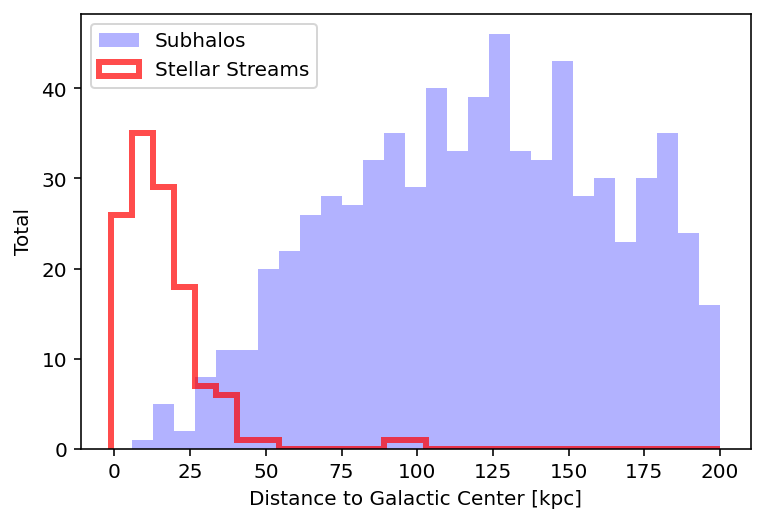

In [49]:
i=0

plt.figure()
plt.hist(cgal.distance.value, bins=np.linspace(-1,200,30),color='blue', alpha=0.3, label='Subhalos'); #shows how many times rs the subhalos lie in
plt.hist(mwsts.summary.distance_o, bins=np.linspace(-1,200,30), color='red', alpha=0.7,histtype='step', lw=3, label='Stellar Streams')
plt.legend(loc='best')
plt.xlabel('Distance to Galactic Center [kpc]')
plt.ylabel('Total')
plt.savefig('Histograms/Subhalo_and_Stream_Dist_to_Gal_Center.png', transparent=False, dpi=200)
i+=1

In [ ]:
np.argmax(mwsts.summary.distance_mid)

In [ ]:
streams = coord.Galactic( mwsts[st].track.galactic.l.wrap_at(180*u.deg).rad, 
             mwsts[st].track.galactic.b.rad)
    
c_631 = coord.Galactocentric(x=trot['x'][631]*u.kpc, y=trot['y']*u.kpc, z=trot['z']*u.kpc)
c_eq = c.transform_to(coord.ICRS)
cgal = c_eq.transform_to(coord.Galactic)

In [ ]:
%matplotlib notebook
gsr = coord.Galactocentric()
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

ax = plt.axes(projection='3d')
for st in mwsts.keys():
    ax.plot(mwsts[st].track.transform_to(gsr).x, mwsts[st].track.transform_to(gsr).y, 
            mwsts[st].track.transform_to(gsr).z, '-r', ms=0.3)
ax.plot(1000,1000,10000, '-r', ms=0.3, label='Stellar Streams')
ax.plot(trot['x'][ind_massive],trot['y'][ind_massive],trot['z'][ind_massive], '.b', label='Subhalos')
#ax.plot(trot['x'][ind_massive][631],trot['y'][ind_massive][631],trot['z'][ind_massive][631], '.g', ms=15 )
#ax.plot(trot['x'][ind_massive][885],trot['y'][ind_massive][885],trot['z'][ind_massive][885], '.m', ms=15 )

ax.set_xlim(-200,200)
ax.set_ylim(-200,200)
ax.set_zlim(-200,200)

ax.set_xlabel('X [kpc]')
ax.set_ylabel('Y [kpc]')
ax.set_zlabel('Z [kpc]')
plt.legend(loc='best')
plt.title('Location of Stellar Streams Compared to DM-Subhalos', size=30)
plt.tight_layout()
plt.savefig('Location of Stellar Streams Compared to DM-Subhalos')
